In [1]:
# 1) 필수 라이브러리 import

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\takea\Desktop\DL\datasets\week1\car+evaluation\car.data',)
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [23]:
import pandas as pd

# car.data 파일을 불러옵니다.


# car.names 파일에서 컬럼 이름을 가져옵니다.
column_names = [
    'buying',
    'maint',
    'doors',
    'persons',
    'lug_boot',
    'safety',
    'class']

# 데이터프레임에 컬럼 이름을 설정합니다.
data.columns = column_names

# 데이터셋 확인
print(data.head())
data

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [24]:
# 데이터프레임을 숫자로 변경
# 범주형 데이터(카테고리)를 숫자로 인코딩 하기 위해 사용함
from sklearn.preprocessing import OrdinalEncoder

encoder_buying = OrdinalEncoder(categories=[['vhigh', 'high', 'med', 'low']])
data['buying'] = encoder_buying.fit_transform(data[['buying']])

encoder_maint = OrdinalEncoder(categories=[['vhigh', 'high', 'med', 'low']])
data['maint'] = encoder_maint.fit_transform(data[['maint']])

# 'doors' 열에서 '5more' 값을 6으로 변경
data['doors'] = data['doors'].replace('2', 2)
data['doors'] = data['doors'].replace('3', 3)
data['doors'] = data['doors'].replace('4', 4)
data['doors'] = data['doors'].replace('5more', 6)

# 'persons' 열에서 'more' 값을 5로 변경
data['persons'] = data['persons'].replace('2', 2)
data['persons'] = data['persons'].replace('4', 4)
data['persons'] = data['persons'].replace('more', 6)

encoder_lug_boot = OrdinalEncoder(categories=[['small', 'med', 'big']])
data['lug_boot'] = encoder_lug_boot.fit_transform(data[['lug_boot']])

encoder_safety = OrdinalEncoder(categories=[['low', 'med', 'high']])
data['safety'] = encoder_safety.fit_transform(data[['safety']])

encoder_class = OrdinalEncoder(categories=[['unacc', 'acc', 'good', 'vgood']])
data['class'] = encoder_class.fit_transform(data[['class']])

data

,buying,maint,doors,persons,lug_boot,safety,class
0,0.0,0.0,2,2,0.0,1.0,0.0
1,0.0,0.0,2,2,0.0,2.0,0.0
2,0.0,0.0,2,2,1.0,0.0,0.0
3,0.0,0.0,2,2,1.0,1.0,0.0
4,0.0,0.0,2,2,1.0,2.0,0.0
...,...,...,...,...,...,...,...
1722,3.0,3.0,6,6,1.0,1.0,2.0
1723,3.0,3.0,6,6,1.0,2.0,3.0
1724,3.0,3.0,6,6,2.0,0.0,0.0
1725,3.0,3.0,6,6,2.0,1.0,2.0


# 데이터 타입, 결측값, 컬럼 확인

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [27]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [28]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0.0,0.0,2,2,0.0,1.0,0.0
1,0.0,0.0,2,2,0.0,2.0,0.0
2,0.0,0.0,2,2,1.0,0.0,0.0
3,0.0,0.0,2,2,1.0,1.0,0.0
4,0.0,0.0,2,2,1.0,2.0,0.0


# EDA 수행

Text(0.5, 1.0, 'Label')

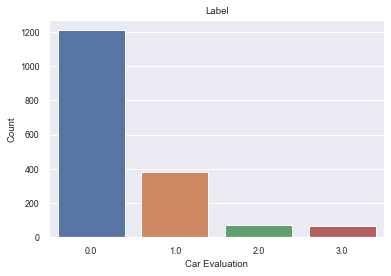

In [29]:
sns.countplot(data = data, x="class")
plt.xlabel("Car Evaluation")
plt.ylabel("Count")
plt.title("Label")

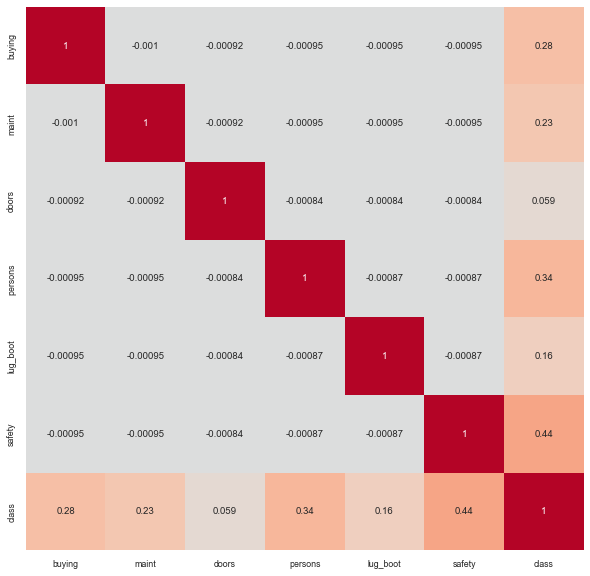

In [30]:
df_corr = data.astype(float).corr()
colormap = plt.cm.coolwarm
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap=colormap, vmin=-1., vmax=1.)
plt.show()

In [31]:
#Splitting the data into training and test test
X = data.iloc[:,0:5].values
y = data.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [32]:
X

array([[0., 0., 2., 2., 0.],
       [0., 0., 2., 2., 0.],
       [0., 0., 2., 2., 1.],
       ...,
       [3., 3., 6., 6., 2.],
       [3., 3., 6., 6., 2.],
       [3., 3., 6., 6., 2.]])

In [33]:
Y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# 다중분류

model = Sequential()

model.add(Dense(5,input_shape=(5,),activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 5)                 30        
                                                                 
 dense_29 (Dense)            (None, 5)                 30        
                                                                 
 dense_30 (Dense)            (None, 5)                 30        
                                                                 
 dense_31 (Dense)            (None, 4)                 24        
                                                                 
Total params: 114 (456.00 Byte)
Trainable params: 114 (456.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 2s 13ms/step - loss: 1.0016 - accuracy: 0.6720 - val_loss: 0.8388 - val_accuracy: 0.6908
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.8027 - accuracy: 0.7024 - val_loss: 0.7864 - val_accuracy: 0.6908
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.7543 - accuracy: 0.7002 - val_loss: 0.7491 - val_accuracy: 0.6994
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 0.7230 - accuracy: 0.7104 - val_loss: 0.7265 - val_accuracy: 0.6908
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.7075 - val_loss: 0.7198 - val_accuracy: 0.6821
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.7024 - val_loss: 0.6761 - val_accuracy: 0.7081
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.7140 - val_loss: 0.6942 - val_accuracy: 0.6908
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 0.6865 - val_loss: 0.5236 - val_accuracy: 0.6908
Epoch 60/100
44/44 [==============================] - 0s 4ms/step - loss: 0.5508 - accuracy: 0.6901 - val_loss: 0.5905 - val_accuracy: 0.6908
Epoch 61/100
44/44 [==============================] - 0s 5ms/step - loss: 0.5532 - accuracy: 0.6944 - val_loss: 0.5537 - val_accuracy: 0.6994
Epoch 62/100
44/44 [==============================] - 0s 5ms/step - loss: 0.5328 - accuracy: 0.6937 - val_loss: 0.5420 - val_accuracy: 0.7023
Epoch 63/100
44/44 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.7038 - val_loss: 0.5355 - val_accuracy: 0.7110
Epoch 64/100
44/44 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7031 - val_loss: 0.5249 - val_accuracy: 0.7052
Epoch 65/100
44/44 [==============================] - 0s 5ms/step - loss: 0.5295 - accuracy: 0.7024 - val_loss: 0.5375 - val_accuracy: 0.6908
Epoch 

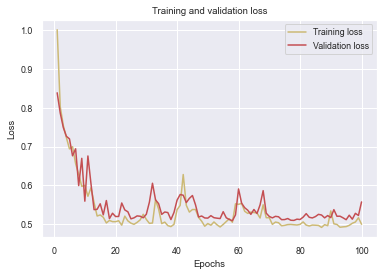

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

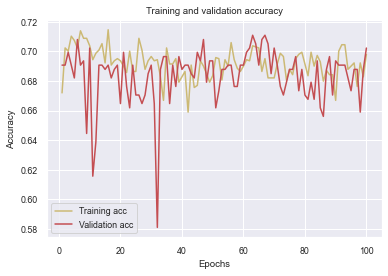

In [47]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       239
           1       0.49      0.91      0.64        77
           2       0.35      0.57      0.43        14
           3       0.00      0.00      0.00        16

    accuracy                           0.70       346
   macro avg       0.44      0.54      0.46       346
weighted avg       0.75      0.70      0.70       346

[[165  65   9   0]
 [  4  70   3   0]
 [  6   0   8   0]
 [  6   7   3   0]]


# ---------------------------

# SupportVectorMachine

In [49]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train_c)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test_c, pred_svm))
print(confusion_matrix(y_test_c, pred_svm))

NameError: name 'y_train_c' is not defined

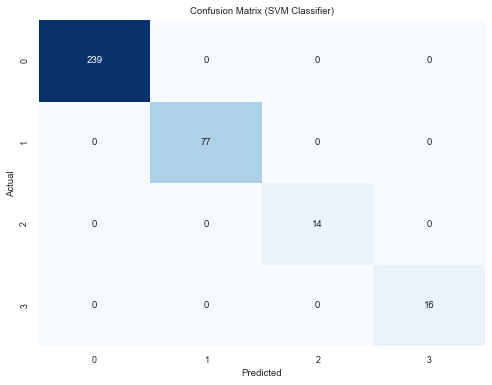

In [54]:
# Confusion Matrix 생성
conf_matrix = confusion_matrix(y_test_c, pred_svm)

# Confusion Matrix를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM Classifier)")
plt.show()

# LogisticRegression

In [55]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train_c)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test_c, pred_lr))
print (confusion_matrix(y_test_c, pred_lr))

ValueError: Found input variables with inconsistent numbers of samples: [1295, 1381]

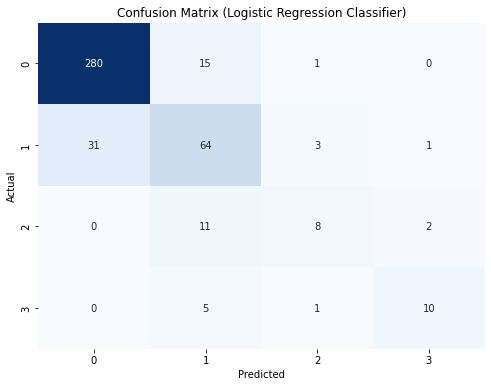

In [44]:
# Confusion Matrix 생성
conf_matrix = confusion_matrix(y_test, pred_lr)

# Confusion Matrix를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression Classifier)")
plt.show()

# DecisionTree

In [40]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9699074074074074
[[295   1   0   0]
 [  7  88   4   0]
 [  0   0  21   0]
 [  0   1   0  15]]


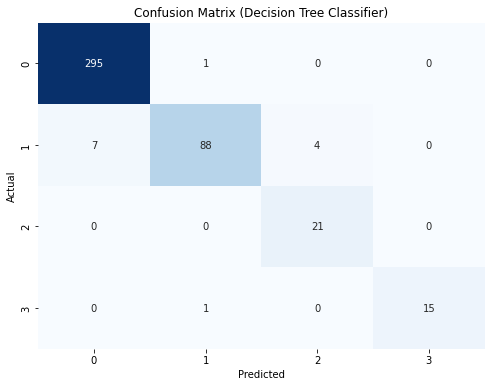

In [45]:
# Confusion Matrix 생성
conf_matrix = confusion_matrix(y_test, pred_dt)

# Confusion Matrix를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree Classifier)")
plt.show()

# RandomForest

In [50]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred_rf = rf_clf.predict(x_test)
print(accuracy_score(y_test, pred_rf))
print (confusion_matrix(y_test, pred_rf))


--- Random Forest ---
0.9814814814814815
[[295   1   0   0]
 [  0  96   2   1]
 [  0   0  20   1]
 [  0   3   0  13]]


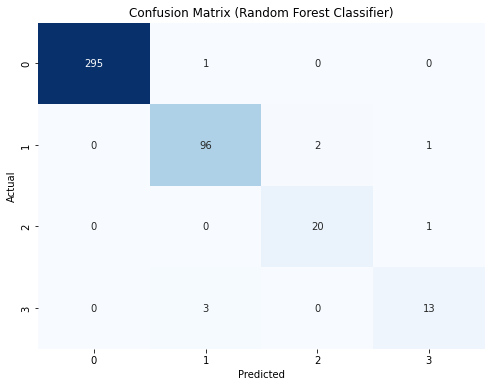

In [51]:
# Confusion Matrix 생성
conf_matrix = confusion_matrix(y_test, pred_rf)

# Confusion Matrix를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()